#### **Importing the necessary libraries**

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

**Problem Statement**:

**State-Space Definition of the given System:**

$$\dot{x_1}(t) = x_2(t)$$

$$\dot{x_2}(t) = -2x_1(t) + 2x_2(t) + 2u(t)$$

**Boundary Conditions:** 

$$t \in [0,6]$$

$$x_1(0) = 1$$

$$x_2(0) = -2$$

**Performance Index:**

$$PI = \dfrac{1}{2} \left[ x_{1}^2(6) + 2x_1(6)x_2(6) + 2x_2^2(6) \right] $$

$$+ \int_0^6 \left[ 2x_{1}^2(t) + 3x_1(t)x_2(t) + 2x_2^2(t) + \dfrac{1}{2} u^2(t) \right]dt$$

**Find the optimal control input $u(t)$ for the given system to minimize the performance index.**

**Solution**:

$$A = \begin{bmatrix} 0 & 1 \\ -2 & 2 \end{bmatrix}$$

$$B = \begin{bmatrix} 0 \\ 2 \end{bmatrix}$$

$$F = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}$$

$$t_f = 6$$

$$Q = \begin{bmatrix} 4 & 3 \\ 3 & 4 \end{bmatrix}$$

$$R = 1$$

### **Eigen-Vales of $A$ are:**

$$\lambda_1 = 1 + j$$

$$\lambda_2 = 1 - j$$

**Since the Real-Part of both the Eigen-Values is positive, the system is unstable.**

### **Matrix Differential Riccati Equation:**

$$\dot{P} = -(A^TP + PA - PBR^{-1}B^TP + Q)$$

$$ \dot{P} = \begin{bmatrix} \dot{P_{11}(t)} & \dot{P_{12}(t)} \\ \dot{P_{12}(t)} & \dot{P_{22}(t)} \end{bmatrix} $$


$$= -\begin{bmatrix} 0 & -2 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} - \begin{bmatrix} 0 & 1 \\ -2 & 2 \end{bmatrix} \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} + \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} \begin{bmatrix} 0 \\ 2 \end{bmatrix} \begin{bmatrix} 0 & 2 \end{bmatrix} \begin{bmatrix} P_{11}(t) & P_{12}(t) \\ P_{12}(t) & P_{22}(t) \end{bmatrix} - \begin{bmatrix} 4 & 3 \\ 3 & 4 \end{bmatrix}$$

Now, lets use **SymPy** to simplify the above equation:


In [3]:
t = sym.symbols('t')
P11, P12, P22 = sym.symbols('P11 P12 P22')
P = sym.Matrix([[P11, P12], [P12, P22]])
A = sym.Matrix([[0, 1], [-2, 2]])
B = sym.Matrix([[0], [2]])
Q = sym.Matrix([[4, 3], [3, 4]])
R = 1

P_dot = -A.T*P - P*A + P*B*1*B.T*P - Q
P_dot

Matrix([
[                4*P12**2 + 4*P12 - 4, -P11 + 4*P12*P22 - 2*P12 + 2*P22 - 3],
[-P11 + 4*P12*P22 - 2*P12 + 2*P22 - 3,        -2*P12 + 4*P22**2 - 4*P22 - 4]])

$$\begin{bmatrix} \dot{P_{11}(t)} & \dot{P_{12}(t)} \\ \dot{P_{12}(t)} & \dot{P_{22}(t)} \end{bmatrix} = \begin{bmatrix} 4P_{12}^2 + 4P_{12} - 4 & -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3 \\ -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3 & -2P_{12}^2 + 4P_{22}^2 - 4P_{22} - 4 \end{bmatrix}$$

$$\dot{P_{11}}(t) = 4P_{12}^2(t) + 4P_{12}(t) - 4$$

$$\dot{P_{12}}(t) = -P_{11}(t) + 4P_{12}(t)P_{22}(t) - 2P_{12}(t) + 2P_{22}(t) - 3$$

$$\dot{P_{22}}(t) = -2P_{12}^2(t) + 4P_{22}^2(t) - 4P_{22}(t) - 4$$

$$P_{11}(6) = 1$$

$$P_{12}(6) = 1$$

$$P_{22}(6) = 2$$

Now, we will solve above equations using **Runge-Kutta Method** and **Euler's Method** with a small time-step.

### **Runge-Kutta Method**:

Solving the above equations using Runge-Kutta Method:

$$\dot{P_{11}}(t) = 4P_{12}^2(t) + 4P_{12}(t) - 4$$

$$\dot{P_{12}}(t) = -P_{11}(t) + 4P_{12}(t)P_{22}(t) - 2P_{12}(t) + 2P_{22}(t) - 3$$

$$\dot{P_{22}}(t) = -2P_{12}^2(t) + 4P_{22}^2(t) - 4P_{22}(t) - 4$$

$$P_{11}(6) = 1$$

$$P_{12}(6) = 1$$

$$P_{22}(6) = 2$$

Let the time-step be 

$$\Delta t = 0.001$$

**Converting to vector form:**

$$\vec{X} = \begin{bmatrix} x_1(t) \\ x_2(t) \\ x_3(t) \end{bmatrix} = \begin{bmatrix} P_{11}(t) \\ P_{12}(t) \\ P_{22}(t) \end{bmatrix}$$


$$\dot{\vec{X}} = \begin{bmatrix} \dot{P_{11}} \\ \dot{P_{12}} \\ \dot{P_{22}} \end{bmatrix} = \begin{bmatrix} 4P_{12}^2 + 4P_{12} - 4 \\ -P_{11} + 4P_{12}P_{22} - 2P_{12} + 2P_{22} - 3 \\ -2P_{12}^2 + 4P_{22}^2 - 4P_{22} - 4 \end{bmatrix} = \begin{bmatrix} 4x_2^2 + 4x_2 - 4 \\ -x_1 + 4x_2x_3 - 2x_2 + 2x_3 - 3 \\ -2x_2^2 + 4x_3^2 - 4x_3 - 4 \end{bmatrix}$$

**Therefore,**

$$\dot{\vec{X}} = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \\ \dot{x_3} \end{bmatrix} = \begin{bmatrix} 4x_2^2 + 4x_2 - 4 \\ -x_1 + 4x_2x_3 - 2x_2 + 2x_3 - 3 \\ -2x_2^2 + 4x_3^2 - 4x_3 - 4 \end{bmatrix}$$

$$\vec{X}_{t_f = 6} = \begin{bmatrix} x_1(6) \\ x_2(6) \\ x_3(6) \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}$$

**Runge-Kutta Method Implementation:**

In [4]:
# Runge-Kutta 4th order
def rk4(f, x0, t0, tf, h):
    t = np.arange(t0, tf, h)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(len(t)-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + h*k1/2, t[i] + h/2)
        k3 = f(x[i] + h*k2/2, t[i] + h/2)
        k4 = f(x[i] + h*k3, t[i] + h)
        x[i+1] = x[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f(x, t):
    return np.array([4*x[1]**2 + 4*x[1] - 4, -x[0] + 4*x[1]*x[2] - 2*x[1] + 2*x[2] - 3, -2*x[1]**2 + 4*x[2]**2 - 4*x[2] - 4])

x0 = np.array([1, 1, 2])

x = rk4(f, x0, 0, 6, 0.001)

In [5]:
x.shape

(6000, 3)

Clearly, we have values for $\vec{X}$ from $t \in [0, 6]$ at a time-step of $\Delta t = 0.001$.

Now, let us plot $P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ vs $t$

($P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ are the values of $\vec{X}$ at each time-step)

**Plotting**:

In [6]:
t = np.arange(0, 6, 0.001)
t.shape

(6000,)

$P_{11}(t)$ vs $t$:

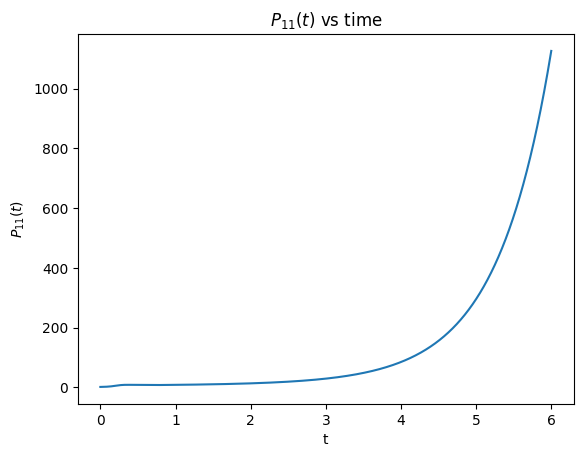

In [7]:
plt.plot(t, x[:,0])
plt.title(r'$P_{11}(t)$ vs time')
plt.xlabel('t')
plt.ylabel(r'$P_{11}(t)$')
plt.show()

$P_{12}(t)$ vs $t$

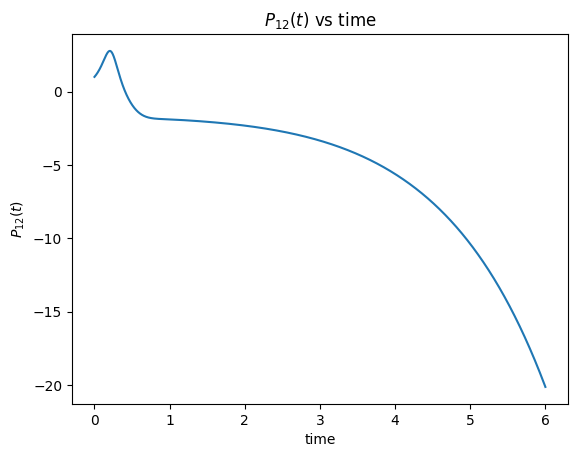

In [8]:
plt.plot(t, x[:,1])
plt.title(r'$P_{12}(t)$ vs time')
plt.xlabel('time')
plt.ylabel(r'$P_{12}(t)$')
plt.show()

$P_{22}(t)$ vs $t$

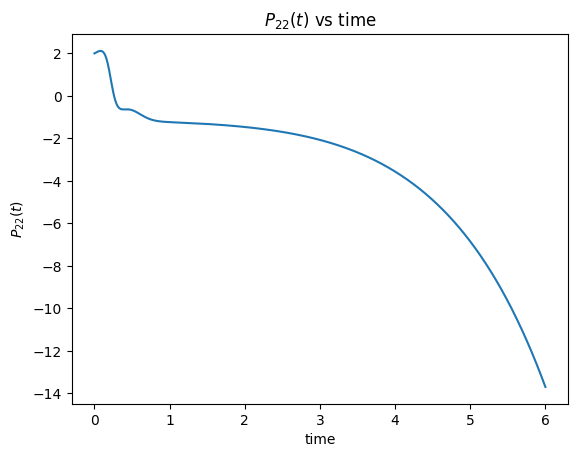

In [9]:
plt.plot(t, x[:,2])
plt.title(r'$P_{22}(t)$ vs time')
plt.xlabel('time')
plt.ylabel(r'$P_{22}(t)$')
plt.show()

### **Plotting them together:**

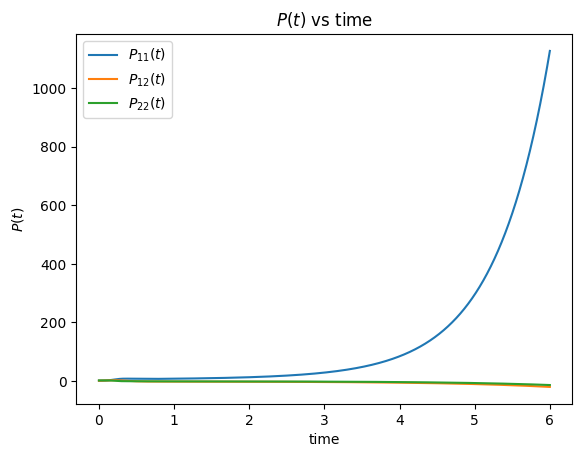

In [10]:
plt.plot(t, x[:,0], label=r'$P_{11}(t)$')
plt.plot(t, x[:,1], label=r'$P_{12}(t)$')
plt.plot(t, x[:,2], label=r'$P_{22}(t)$')

plt.title(r'$P(t)$ vs time')

plt.xlabel('time')
plt.ylabel(r'$P(t)$')
plt.legend()

plt.show()

In [11]:
x_rk4 = x.copy()

### **Euler's Method**:

$$\dot{P_{11}}(t) = 4P_{12}^2(t) + 4P_{12}(t) - 4$$

$$\dot{P_{12}}(t) = -P_{11}(t) + 4P_{12}(t)P_{22}(t) - 2P_{12}(t) + 2P_{22}(t) - 3$$

$$\dot{P_{22}}(t) = -2P_{12}^2(t) + 4P_{22}^2(t) - 4P_{22}(t) - 4$$

$$P_{11}(6) = 1$$

$$P_{12}(6) = 1$$

$$P_{22}(6) = 2$$

Solving the above equations using Euler's Method:

Let the time-step be 

$$\Delta t = 0.001$$

$$\dot{\vec{X}} = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \\ \dot{x_3} \end{bmatrix} = \begin{bmatrix} 4x_2^2 + 4x_2 - 4 \\ -x_1 + 4x_2x_3 - 2x_2 + 2x_3 - 3 \\ -2x_2^2 + 4x_3^2 - 4x_3 - 4 \end{bmatrix}$$

$$\vec{X}_{t_f = 6} = \begin{bmatrix} x_1(6) \\ x_2(6) \\ x_3(6) \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}$$

**Euler's Method Implementation:**

In [12]:
# Solve using Euler's method
def euler(f, x0, t0, tf, h):
    t = np.arange(t0, tf, h)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(len(t)-1):
        x[i+1] = x[i] + h*f(x[i], t[i])
    return x

def f(x, t):
    return np.array([4*x[1]**2 + 4*x[1] - 4, -x[0] + 4*x[1]*x[2] - 2*x[1] + 2*x[2] - 3, -2*x[1]**2 + 4*x[2]**2 - 4*x[2] - 4])


x0 = np.array([1, 1, 2])

x = euler(f, x0, 0, 6, 0.001)

In [13]:
x.shape

(6000, 3)

Clearly, we have values for $\vec{X}$ from $t \in [0, 6]$ at a time-step of $\Delta t = 0.001$.

Now, let us plot $P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ vs $t$

($P_{11}(t)$, $P_{12}(t)$ and $P_{22}(t)$ are the values of $\vec{X}$ at each time-step)

**Plotting**:

In [14]:
t = np.arange(0, 6, 0.001)
t.shape

(6000,)

$P_{11}(t)$ vs $t$

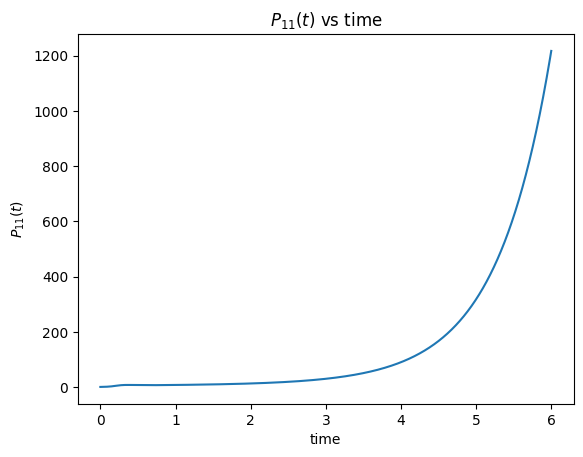

In [15]:
plt.plot(t, x[:,0])
plt.title(r'$P_{11}(t)$ vs time')
plt.xlabel('time')
plt.ylabel(r'$P_{11}(t)$')
plt.show()

$P_{12}(t)$ vs $t$

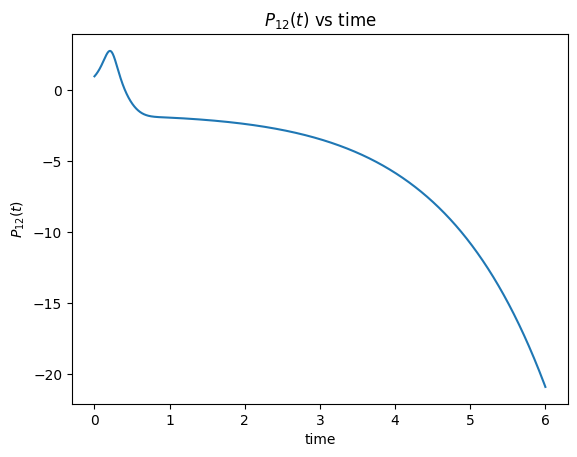

In [16]:
plt.plot(t, x[:,1])
plt.title(r'$P_{12}(t)$ vs time')
plt.xlabel('time')
plt.ylabel(r'$P_{12}(t)$')
plt.show()

$P_{22}(t)$ vs $t$

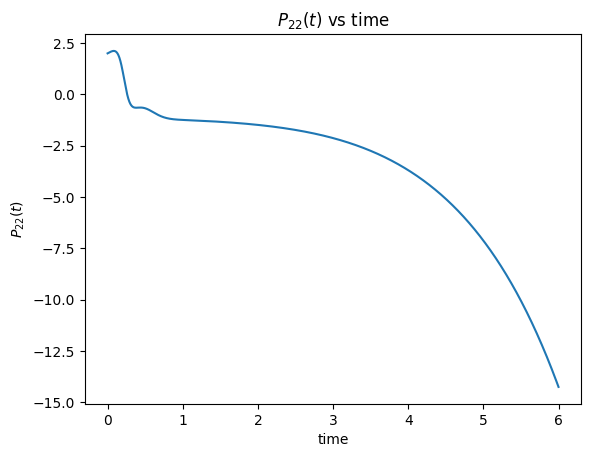

In [17]:
plt.plot(t, x[:,2])
plt.title(r'$P_{22}(t)$ vs time')
plt.xlabel('time')
plt.ylabel(r'$P_{22}(t)$')
plt.show()

### **Plotting them together:**

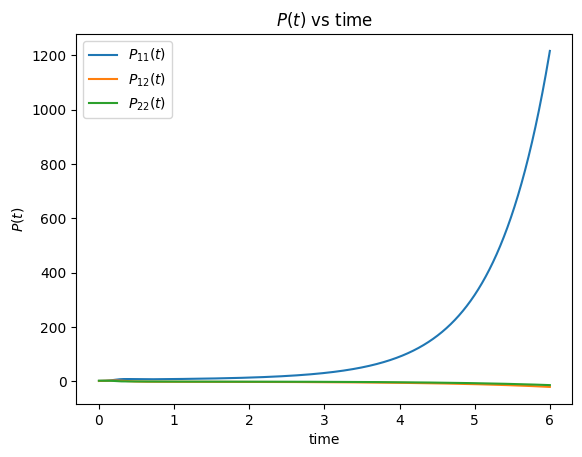

In [18]:
plt.plot(t, x[:,0], label=r'$P_{11}(t)$')
plt.plot(t, x[:,1], label=r'$P_{12}(t)$')
plt.plot(t, x[:,2], label=r'$P_{22}(t)$')

plt.title(r'$P(t)$ vs time')

plt.xlabel('time')
plt.ylabel(r'$P(t)$')
plt.legend()

plt.show()